In [ ]:
import pylab as pl
%pylab inline
import numpy as np
import pandas 
import gradientDescent as gd
import loadParametersP1 as params
import loadFittingDataP1 as fitData


# 1. Implement a basic gradient descent procedure to minimize scalar functions of a vector argument.
Write it generically, so that you can easily specify the objective function and the function
to compute the gradient. You should be able to specify the initial guess, the step size (or learning
rate) and the convergence criterion (e.g., a threshold such that the algorithm terminates
when the difference in objective function value on two successive steps is below this threshold
or when the norm of the gradient is below this threshold). For this question, you can use a
fixed step size in your implementation. Test your gradient descent procedure on two functions
with the parameters provided by us in parametersp1.txt (for data files, we also provide basic
reading scripts for MATLAB and Python): the negative of a Gaussian function and a quadratic
bowl. Discuss (and illustrate) the effect of the choice of starting guess, the step size, and the
convergence criterion on the resulting solution, as well as how the norm of the gradient evolves
through the iteration.

Things to Do:

1. Test gradient descent procedure on the given functions and parameteres

2. Study the effect of the choice of
    1. starting guess
    2. step size
    3. convergence criteria
3. Study how the norm of the gradient evolves

In [ ]:
# Load parameters
gaussMean,gaussCov,quadBowlA,quadBowlb = params.getData()

# Test implementation of gradient descent on Gaussian function

objective_fn = lambda x : gd.computeGaussian(x, gaussMean, gaussCov)
gradient_fn = lambda x: gd.differentiateGaussian(x, gaussMean, gaussCov)
                                                                                        
best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(0,100),np.random.randint(0,100)], 
                                                              step_size=1000000,
                                                              convergence = 1e-15)

num_iters = len(norm)
print 'Gaussian converged to: ', best_value, best_guess, ' in ', num_iters, ' iterations.'
print 
print guess

Evolution of gradient norm


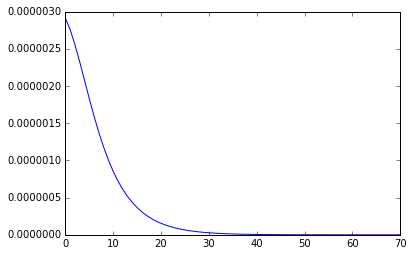

Evolution of function value


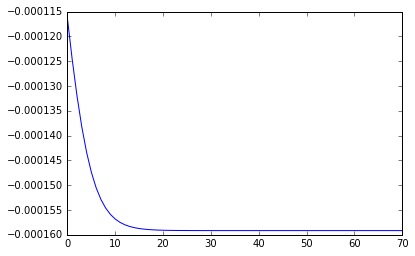

In [ ]:
# Plot how the norm changes over time 
print 'Evolution of gradient norm'#, norm
pl.plot(range(num_iters), norm)
pl.show()

# Plot how the function value changes over time
print 'Evolution of function value'
pl.plot(range(num_iters), fxn)
pl.show()

Now, test the implementation of the quadratic bowl using the given parameters.

In [ ]:
# Test implementation of gradient descent on the Quadratic Bowl

objective_fn = lambda x : gd.computeQuadBowl(x,quadBowlA,quadBowlb)
gradient_fn = lambda x: gd.differentiateQuadBowl(x, quadBowlA,quadBowlb)

best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(-100,100),np.random.randint(-100,100)], 
                                                              step_size=1000,
                                                              convergence = 1e-10)

num_iters = len(norm)
print 'Quadratic Bowl converged to: ', best_value, best_guess, ' in ', num_iters, ' iterations.'

obective_fn params [ 309994.  130030.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -176009600.0
-176009600.0
params [ 309994.  130030.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -176009600.0
params [ -6.  30.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -9600.0
params [ -6.  30.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -9600.0
obective_fn params [ -3.74938001e+09  -2.84973997e+09] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result 2.6396479904e+12
2.6396479904e+12
params [ -3.74938001e+09  -2.84973997e+09] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result 2.6396479904e+12
params [ 309994.  130030.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -176009600.0
params [ 309994.  130030.] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -176009600.0
obective_fn params [  5.17387509e+13   4.72414504e+13] 
[[ 10.   5.]
 [  5.  10.]] 
[ 400.  400.]
result -3.9592080528e+16
-3.9592080528e+16
params [  5.17387509e+13   4.72414504e+13] 
[[ 10.   5.]
 [  5.  10.]] 

In [ ]:
# Plot how the norm changes over time 
print 'Evolution of gradient norm'#, norm
pl.plot(range(num_iters), norm)
pl.show()

# Plot how the function value changes over time
print 'Evolution of function value'
pl.plot(range(num_iters), fxn)
pl.show()

### Choice of starting guess, step size and convergence criteria
Discuss (and illustrate) the effect of the choice of starting guess, the step size, and the
convergence criterion on the resulting solution, as well as how the norm of the gradient evolves
through the iteration.

In [ ]:
# Test the effect of the step size on the number of iterations to convergence and on the solution converged to

def test_step(step_size):
    best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(-100,100),np.random.randint(-100,100)], 
                                                              step_size=step_size,
                                                              convergence = 1e-10)
    return best_value, len(fxn) #function value, number iterations

step_sizes = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

values= []
iters = []

for step_size in step_sizes:
    val, its = test_step(step_size)
    values.append(val)
    iters.append(its)
    
# Plot the variation in convergence value as a function of step_size

# Plot the variation in number of iterations as a function of step_size


In [ ]:
# Test the effect of the convergence criteria on the number of iterations to convergence and on the solution converged to

def test_convergence(rate):
    best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(-100,100),np.random.randint(-100,100)], 
                                                              step_size= 1000,
                                                              convergence = rate)
    return best_value, len(fxn) #function value, number iterations

criteria = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 10]

values= []
iters = []

for rate in criteria:
    val, its = test_convergence(rate)
    values.append(val)
    iters.append(its)
    
# Plot the variation in convergence value as a function of step_size

# Plot the variation in number of iterations as a function of step_size


In [ ]:
# Test the effect of the starting guess on the number of iterations to convergence and on the solution converged to

TO DO

def test_convergence(rate):
    best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(-100,100),np.random.randint(-100,100)], 
                                                              step_size= 1000,
                                                              convergence = rate)
    return best_value, len(fxn) #function value, number iterations

criteria = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 10]

values= []
iters = []

for rate in criteria:
    val, its = test_convergence(rate)
    values.append(val)
    iters.append(its)
    
# Plot the variation in convergence value as a function of step_size

# Plot the variation in number of iterations as a function of step_size


# 2. The gradient function may not always look as simple and clean as the ones provided above. 
A common way to check if one’s gradient evaluation is correct or not is to use the central difference
approximation (see the “Finite difference” article in Wikipedia) to numerically evaluate
the gradient at various points. Write code to approximate the gradient of a function numerically
at a given point using this method. Verify the gradient values on the functions you used
in the question above by comparing the closed-form and numerical gradients at various points.
Discuss the effect of changing the difference step (or $\delta$) on the accuracy of the gradient
evaluation.


In [ ]:
# For various values of delta, calculate the gradient using the closed form and the approximation of Gaussian
# Use 1-D points for simpler visualization

diffs = []
deltas = [1e-8, 1e-6, 1e-4, 1e-2,1,10,1e2,1e4]

for d in deltas:
    point = -100 + 200* np.random.random()

    true = gd.differentiateGaussian(point, gaussMean, gaussCov)
    approx_fn = lambda x: Gaussian(x, gaussMean, gaussCov)
    approx = gd.approximateGradient(point, approx_fn, d)
    
    diffs.append(true-approx)
    
#Plot the difference in gradient value vs delta value
pl.plot(x=deltas, y=diffs)
pl.show()

In [ ]:
# For various values of delta, calculate the gradient using the closed form and the approximation of Quadratic Bowl
# Use 1-D points for simpler visualization

diffs = []
deltas = [1e-8, 1e-6, 1e-4, 1e-2,1,10,1e2,1e4]

for d in deltas:
    point = -100 + 200* np.random.random()

    true = gd.differentiateQuadBowl(point,quadBowlA,quadBowlb)
    approx_fn = lambda x: gd.computeQuadBowl(x,quadBowlA,quadBowlb)
    approx = gd.approximateGradient(point, approx_fn, delta)
    
    diffs.append(true-approx)

#Plot the difference in gradient value vs delta value
pl.plot(x=deltas, y=diffs)
pl.show()

## 3. In machine learning and statistical estimation context, batch gradient descent uses samples from the full training set for each parameter update. 
Thus, each iteration would be slow for a large dataset. In addition, the native form of batch gradient descent does not provide a way to incorporate new data efficiently (i.e., in an online setting). Stochastic gradient descent (SGD)
addresses these problems by using stochastic approximation on the gradient term (See Bishop
3.1.3, 5.2.4 and Wikipedia). In this question, we will use both batch gradient descent and SGD
on a least square fitting problem.
The dataset is provided in fittingdatap1 x.txt and fittingdatap1 y.txt. Each row of X and
y represents a single data sample pair (x(i), y(i)) and your goal is to find a coefficient vector θ
that minimizes the least square error of J(θ) = ||Xθ − y||2. In this question, you don’t need to augment X
with 1’s as we did in the lecture. Notice that J(θ) is natively a function over the whole dataset
and there is a closed-form solution to this problem (Bishop Equation (3.15)), which would be
useful for checking your answers.

a) Use batch gradient descent on J(θ) with a fixed step size. This would be the case where the
gradient of the cost function for the entire training dataset is used in each parameter update.


In [ ]:
# Run batch gradient descent with a squared error objective function

#Load data set
X, Y = fitData.getData()

objective_fn = lambda x : gd.computeSquaredLoss(X, Y, theta)
gradient_fn = lambda x: gd.differentiateSquaredLoss(X,Y,theta)
                                                                                        
best_guess, best_value, guess, fxn, norm = gd.gradientDescent(objective_fn,
                                                              gradient_fn,
                                                              initial_guess= [np.random.randint(0,100),np.random.randint(0,100)], 
                                                              step_size=1000,
                                                              convergence = 1e-4)

print 'Least squares converged to: ', best_guess, best_value

b) In contrast to batch gradient descent, which uses all training data in every parameter update,
SGD performs a parameter update based on a single training example:
θt+1 = θt − ηt∇θJ(θt
; x
(i)
, y(i)
),
where ηt
is the learning rate for each iteration t = 1, 2, ... and J(θt
; x
(i)
, y(i)
) = (x
(i)T
θt−y
(i)
)
2
is
the objective function in terms of a single data sample. Write a general procedure that performs
SGD on this dataset. You should first derive the point-wise (with respect to a single data
sample) gradient function, ∇θJ(θt
; x
(i)
, y(i)
). Then write a procedure to perform parameter
update by iterating through the samples in the dataset for some number of rounds until a
stopping criterion is reached (such as convergence of the full objective function over all data
points).

c) Compare the behavior of the two implementations in terms of accuracy and number of evaluations
of the point-wise gradient, ∇θJ(θt
; x
(i)
, y(i)
). That is, each iteration of batch gradient
descent takes n (the number of total samples) evaluations of the point-wise gradients, whereas
each iteration of SGD takes one evaluation of it.


In [ ]:
# Run stochastic gradient descent on the given dataset then compare it with the previous batch gradient descent
best_guess, best_value, guess, fxn, norm = stochasticGradientDescent(x = X,
                                                                     y = Y, 
                                                                     objective_fn = objective_fn,
                                                                     gradient_fn = gradient_fn,
                                                                     initial_guess= [np.random.randint(0,100),np.random.randint(0,100)], 
                                                                     step_size=1000,
                                                                     convergence = 1e-4)

print 'Stochastic gradient descent converged to ', best_value, ' in ', len(norm), ' iterations'

# Plot how the norm changes over time 
pl.plot(x=range(len(norm)), y= norm)
pl.show()

# Plot how the function value changes over time
pl.plot(x=range(len(fxn)), y= fxn)
pl.show()
